
## 국민건강보험 건강검진 정보는?

* 건강검진정보란 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만40세와 만66세에 도달한 이들이 받게 되는 생애전환기건강진단 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터 중 만개의 데이터를 임의로 추출했습니다.

## EDA
* EDA는 [부스트코스] 파이썬으로 시작하는 데이터 사이언스 > 4. 건강검진 데이터로 가설검정하기 를 참고해 주세요.
https://www.edwith.org/boostcourse-ds-510/lectures/28143


## 회귀로 허리둘레 예측하기
* 건강검진 데이터를 바탕으로 허리둘레 예측하기

* 건강검진 센터에서 허리둘레 측정이 누락된 사람이 있다고 가정합니다.
* 검진 데이터를 바탕으로 허리둘레를 예측한다면 건강한 생활습관을 가이드하거나 국민건강을 위한 계획을 수립하는데 도움이 될 것입니다.
* 회귀 모델을 사용해서 건강검진 데이터를 바탕으로 허리둘레를 예측해 봅니다.

## TODO 좋은 성능을 내는 알고리즘과 파라메터 찾기

* 머신러닝을 통해 데이터를 예측하는 과정은 마치 우리가 기출문제와 정답을 보며 학습을 하고 실제 시험에서 문제를 풀게 되는 과정과 유사합니다. 

* 적절한 머신러닝 알고리즘과 파라메터를 설정하면 좋은 성능을 낼 것입니다. 
* 트리 계열의 3가지 모델의 성능을 파라메터 값에 따라 비교해 보고 가장 좋은 성능을 내는 모델을 찾아봅니다.
* 머신러닝 알고리즘이 좋은 성능을 낼 수 있도록 여러 방법으로 허리둘레를 예측해 봅니다.

## 필요한 라이브러리 로드

* 영상과 프로젝트 코드 작성에 사용한 버전입니다.
    * pandas : 1.0.1
    * numpy : 1.18.1
    * scikit-learn(sklearn) : 0.22.1

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 셀프리뷰를 위한 파일 로드

In [2]:
# check_util 폴더의 regression_checker.py 를 import 해서 사용합니다.
# regression_checker 명칭을 줄여서 checker 라고 사용합니다.
import check_util.regression_checker as checker

In [3]:
# 셀프리뷰 파일이 정상로드 되었는지 확인합니다.
checker.check_load_self_review()

셀프리뷰 파일이 정상로드 되었습니다. 이어서 진행하셔도 좋습니다.


,subject,criteria,content,flag
todo,,,,
1,여러 모델 사용하기,여러 모델 사용하기,트리계열의 모델을 리스트로 만듭니다.,False
2,랜덤서치 만들기,모델의 파라메터 지정하기,트리의 깊이를 지정하기 위해 max_depth 를 랜덤하게 10개의 정수 값(int...,False
3,랜덤서치 만들기,모델의 파라메터 지정하기,피처를 샘플링할 비율을 지정하기 위해 max_features 를 랜덤하게 10개의...,False
4,랜덤서치 만들기,크로스 밸리데이션 사용하기,RandomizedSearchCV의 크로스밸리데이션의 조각을 3개로 나눕니다.,False
5,모델의 성능 측정하기,모델 평가하기,RMSE 로 오차값이 5보다 작은 값이 나오는지 측정합니다.,False
6,모델의 성능 측정하기,모델 평가하기,r^2 스코어로 0.7 보다 큰 값이 나오는지 측정합니다.,False


## 한글폰트 사용하기

In [4]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드 합니다.
import os

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [5]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

## 데이터셋 로드

In [6]:
df = pd.read_csv("data/health.csv")
df.shape

(10000, 34)

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='허리둘레', ylabel='Density'>

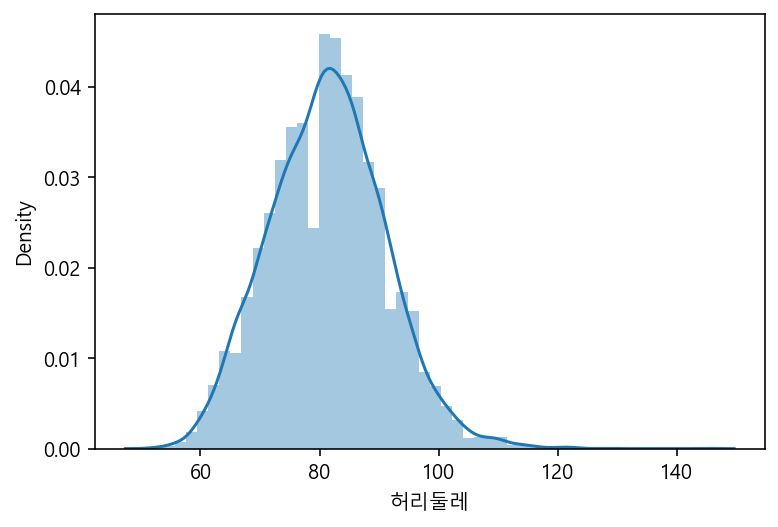

In [7]:
sns.distplot(df["허리둘레"])

In [8]:
df["허리둘레"].describe()

count    10000.000000
mean        81.349810
std          9.721046
min         52.000000
25%         75.000000
50%         81.000000
75%         88.000000
max        145.000000
Name: 허리둘레, dtype: float64

## 데이터 전처리

### 결측치 채우기
* 의미있는 값으로 채우면 분류 예측 결과가 더 좋아집니다.

In [9]:
df = df.replace(np.nan, 1)
df.isnull().sum()

기준년도            0
가입자일련번호         0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤        0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진 수검여부       0
치아우식증유무         0
결손치유무           0
치아마모증유무         0
제3대구치(사랑니)이상    0
치석              0
데이터공개일자         0
dtype: int64

## 학습, 예측에 사용할 컬럼

In [10]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.tolist()

feature_names

['기준년도',
 '가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '구강검진 수검여부',
 '치아우식증유무',
 '결손치유무',
 '치아마모증유무',
 '제3대구치(사랑니)이상',
 '치석',
 '데이터공개일자']

In [11]:
# feature_names 에 사용할 컬럼을 담아줍니다.
feature_names = [
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '치석',
]

## 정답값이자 예측해야 될 값

In [12]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "허리둘레"
label_name

'허리둘레'

## 학습, 예측 데이터셋 만들기

In [13]:
X = df[feature_names]
y = df[label_name]

X.shape, y.shape

((10000, 25), (10000,))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [15]:
# 학습 세트 확인 예) 기출문제(X_train)와 기출문제의 정답(y_train)
print(X_train.shape, y_train.shape)
X_train.head()

(8000, 25) (8000,)


,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치석
9254,1,10,11,170.0,60.0,1.0,1.2,1.0,1.0,97.0,...,126.0,15.0,1.0,1.1,18.0,10.0,20.0,3.0,1.0,1.0
1561,2,9,46,150.0,35.0,1.2,1.2,1.0,1.0,100.0,...,119.0,11.5,1.0,0.5,38.0,44.0,34.0,1.0,0.0,1.0
1670,2,13,11,145.0,45.0,1.0,1.0,1.0,1.0,144.0,...,197.0,14.3,1.0,0.6,23.0,20.0,19.0,1.0,0.0,0.0
6087,1,9,11,165.0,80.0,0.4,0.5,1.0,1.0,135.0,...,82.0,17.0,3.0,0.8,67.0,62.0,52.0,3.0,1.0,1.0
6669,1,11,26,165.0,70.0,0.8,0.6,1.0,1.0,150.0,...,92.0,15.0,1.0,0.9,22.0,28.0,57.0,2.0,1.0,1.0


In [16]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제와 실전 시험 문제의 정답

print(X_test.shape, y_test.shape)

(2000, 25) (2000,)


## 머신러닝 알고리즘 가져오기
1. 의사결정나무 사용하기
1. 랜덤포레스트 사용하기
1. 그라디언트 부스팅 사용하기

### <font color="red">TODO 1</font> 사용할 알고리즘을 리스트 형태로 만들기
* <font color="blue">estimators</font>라는 변수에 DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor를 리스트로 할당해 줍니다.

In [17]:
# 밑줄을 채워 코드를 완성해 주세요.
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    GradientBoostingRegressor(random_state=42)
]
estimators

[DecisionTreeRegressor(random_state=42),
 RandomForestRegressor(random_state=42),
 GradientBoostingRegressor(random_state=42)]

#### <font color="blue">TODO 1 Self Review</font>

In [18]:
# estimators변수에 DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor를 리스트로 할당되었는지 확인합니다.
# 다음의 코드를 실행해서 확인합니다.
# 아래의 코드를 실행해서 확인을 해주어야 제출파일을 작성할 수 있으니 꼭 확인해 주세요!
checker.check_estimator(estimators)   

모델을 잘 정의해 주셨습니다. 이어서 진행하셔도 좋습니다.


In [19]:
# 랜덤서치를 구현하기 전에 for문을 통해 여러 개의 모델을 순회하는 반복문을 구현해 봅니다. 
# result 에는 각 모델의 결과값을 저장하고
# results 에 각 모델에서 나온 result 값을 모아줍니다.

results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

# 데이터 프레임 형태로 변환해 보면 모델별 결과값을 데이터프레임에 추가해서 보면 값을 비교해 볼 수 있을거 같습니다.
pd.DataFrame(results)

,0
0,DecisionTreeRegressor
1,RandomForestRegressor
2,GradientBoostingRegressor


### <font color="red">TODO 2~3</font> 랜덤한 파라메터 값 리스트로 구현하기
* RandomizedSearchCV 에 사용할 param_distributions 값을 만들어 주세요.
* max_depth 값을 int 형식으로 랜덤하게 10개의 원소를 갖는 리스트 형태로 만들어 주세요.
* max_features 값을 float 형식으로 랜덤하게 10개의 원소를 갖는 리스트 형태로 만들어 주세요.

In [21]:
# 함수를 구현합니다.
def make_params():

    max_depth = np.random.randint(10, 30, 10) # 밑줄을 채워 코드를 완성해 주세요.
    max_features = np.random.uniform(0.5, 1.0, 10) # 밑줄을 채워 코드를 완성해 주세요.

    param_distributions = {"max_depth": max_depth, "max_features": max_features }

    return param_distributions

# 구현한 함수의 결과 값을 param_distributions 변수에 할당합니다.
param_distributions = make_params()
param_distributions

{'max_depth': array([14, 22, 15, 17, 18, 29, 20, 22, 23, 10]),
 'max_features': array([0.68783035, 0.90732339, 0.60501686, 0.61498371, 0.71839816,
        0.66694684, 0.80715931, 0.57808317, 0.84967943, 0.54427542])}

#### <font color="blue">TODO 2 Self Review</font>

In [22]:
# max_depth 값을 int 형식으로 랜덤하게 10개의 원소를 갖는 리스트 형태로 만들어졌는지 확인합니다.
# 다음의 코드를 실행해서 확인합니다.
# 아래의 코드를 실행해서 확인을 해주어야 제출파일을 작성할 수 있으니 꼭 확인해 주세요!
checker.check_max_depth(param_distributions)

max_depth를 잘 구현해 주셨습니다. 이어서 진행하셔도 좋습니다.


#### <font color="blue">TODO 3 Self Review</font>

In [23]:
# max_features 값을 float 형식으로 랜덤하게 10개의 원소를 갖는 리스트 형태로 만들어졌는지 확인합니다.
# 다음의 코드를 실행해서 확인합니다.
# 아래의 코드를 실행해서 확인을 해주어야 제출파일을 작성할 수 있으니 꼭 확인해 주세요!
checker.check_max_features(param_distributions)

max_features를 잘 구현해 주셨습니다. 이어서 진행하셔도 좋습니다.


### <font color="red">TODO 4</font> RandomizedSearchCV 구현하기
* RandomizedSearchCV 를 정의해 주세요.
* cv값은 3개 이상으로 구현해 주세요. 조각이 너무 많으면 오래 걸릴 수 있습니다. 
* cv값을 3개로 구현했을 때 너무 오래 걸리지 않는다면 조각의 수를 늘려주셔도 됩니다.
* <font color="blue">n_iter를 5로 설정하고 cv를 3으로 설정하면 하나의 모델을 학습할 때 15번의 fit</font>을 하게 됩니다.
* n_iter의 값을 많이 설정할 수록 더 많은 파라메터를 테스트할 수 있습니다.
* 또, n_iter의 값을 더 크게 설정한다면 파라메터의 갯수도 그 만큼 늘려주어야 많은 파라메터 중 성능이 좋은 파라메터를 찾을 수 있습니다.
* 아래의 코드 실행 시 <font color="red">시간이 너무 오래 걸린다면 google colaboratory</font> 를 통해 실습하시는 것을 권장드립니다.

In [24]:
# RandomizedSearchCV 를 통해 위에서 정의한 모델과 해당 모델의 최적의 파라메터값을 찾아봅니다.
# 여러 모델을 cross validation으로 비교하기 때문에 CPU, 메모리의 성능에 따라 10분 이상이 걸릴 수도 있습니다.
# 시간이 너무 오래 걸린다면 google colaboratory 를 통해 실습하시는 것을 권장드립니다.

from sklearn.model_selection import RandomizedSearchCV

results = []
for estimator in estimators:
    result = []

    param_distributions = make_params()

    # 밑줄을 채워 코드를 완성해 주세요.
    regressor = RandomizedSearchCV(estimator,
        param_distributions,
        n_iter=5,
        scoring=None,
        n_jobs=-1,
        cv=5, # 밑줄을 채워 코드를 완성해 주세요.
        verbose=2, 
        random_state=42)

    regressor.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(regressor.best_params_)
    result.append(regressor.best_estimator_)
    result.append(regressor.best_score_)
    result.append(regressor.cv_results_)
    results.append(result)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


#### <font color="blue">TODO 4 Self Review</font>
* 크로스밸리데이션의 조각 수 확인

In [25]:
# 크로스밸리데이션의 조각의 수를 설정하는 cv 값이 설정되었는지 다음의 코드를 실행해서 확인합니다.
# cv값이 3개 이상으로 설정되어 있어야 합니다.
# 아래의 코드를 실행해서 확인을 해주어야 제출파일을 작성할 수 있으니 꼭 확인해 주세요!
checker.check_cv(regressor)

cross validation을 여러개의 조각으로 잘 나누어 주셨습니다. 이어서 진행하셔도 좋습니다.


### 결과를 데이터프레임 형태로 만들기

In [26]:
df_cv = pd.DataFrame(results)
df_cv.columns = ["model", "params", "estimator", "score", "cv_result"]
df_cv = df_cv.sort_values("score", ascending=False)
df_cv

,model,params,estimator,score,cv_result
1,RandomForestRegressor,"{'max_features': 0.708931095113309, 'max_depth...","(DecisionTreeRegressor(max_depth=24, max_featu...",0.747378,"{'mean_fit_time': [4.5232189178466795, 4.61047..."
2,GradientBoostingRegressor,"{'max_features': 0.5836005539661878, 'max_dept...",([DecisionTreeRegressor(criterion='friedman_ms...,0.730400,"{'mean_fit_time': [6.075632190704345, 6.756295..."
0,DecisionTreeRegressor,"{'max_features': 0.8591770794948954, 'max_dept...","DecisionTreeRegressor(max_depth=10, max_featur...",0.631351,"{'mean_fit_time': [0.10960679054260254, 0.1548..."


### 가장 좋은 성능을 내는 estimator 찾기

In [27]:
best_estimator = df_cv.iloc[0]["estimator"]
best_estimator

RandomForestRegressor(max_depth=24, max_features=0.708931095113309,
                      random_state=42)

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [28]:
best_estimator.fit(X_train, y_train)

RandomForestRegressor(max_depth=24, max_features=0.708931095113309,
                      random_state=42)

## cross validation 으로 학습 세트의 오차 측정하기

In [29]:
# train set와 valid set를 나눠 cross validation으로 train set으로 학습한 모델을 검증합니다.
# test 점수를 예측하기 전에 
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(best_estimator, X_train, y_train, cv=5, verbose=2, n_jobs=-1)
y_valid_predict[:5]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.6s remaining:    6.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished


array([78.506, 61.521, 72.326, 91.953, 86.01 ])

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='허리둘레'>

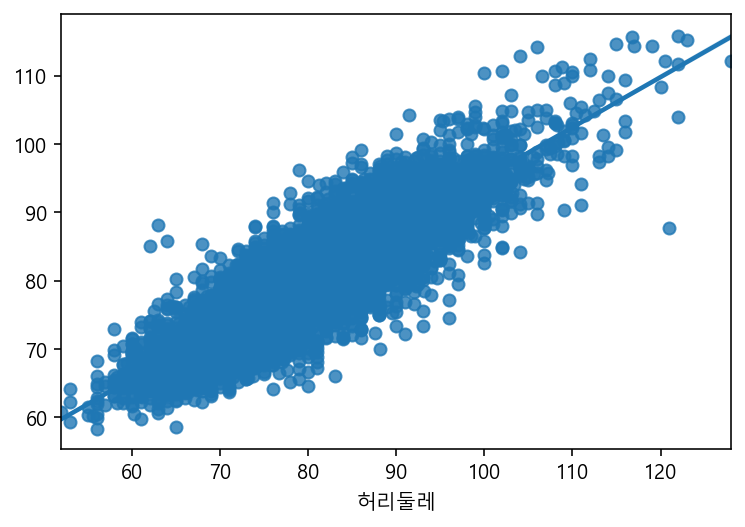

In [30]:
# regplot 으로 결과 값을 비교합니다.
# 회귀선에서 멀리 떨어질 수록 실제값과 예측값의 차이가 많이 납니다.
# 회귀선에 가까울수록 실제값과 예측값의 차이가 작습니다.

sns.regplot(y_train, y_valid_predict)

In [31]:
# r2_score 를 구합니다. 1에 가까울 수록 정확도가 높습니다.
# 0.75 이상의 값이 나오는지 확인합니다.

from sklearn.metrics import r2_score

r2_score(y_train, y_valid_predict)

0.7480006360080069

c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='허리둘레', ylabel='Density'>

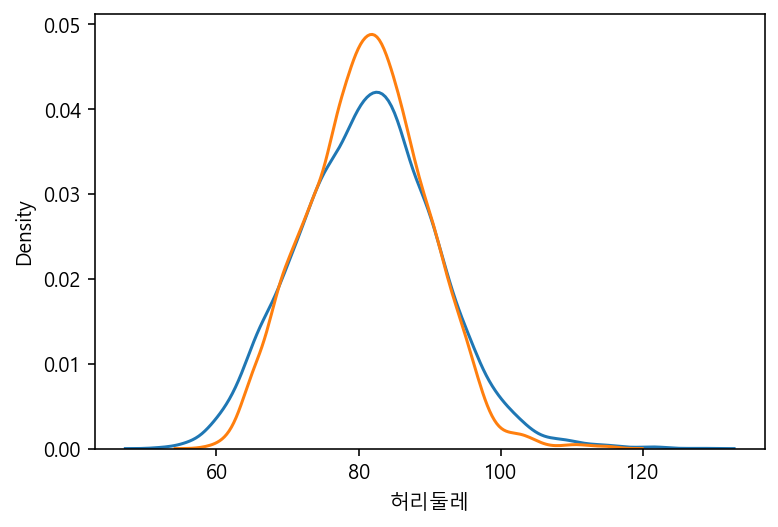

In [32]:
# distplot으로 정답값과 예측값의 분포를 그립니다.

sns.distplot(y_train, hist=False, label="train")
sns.distplot(y_valid_predict, hist=False, label="predict")

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [33]:
# 위에서 찾은 best_estimator 를 통해 실제값을 예측합니다.
y_predict = best_estimator.predict(X_test)
y_predict[:5]

array([84.889     , 77.21092308, 82.985     , 88.54      , 76.96      ])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

In [34]:
# 피처의 중요도를 추출하기
feature_importance = best_estimator.feature_importances_
feature_importance

array([4.69668797e-02, 7.91266682e-02, 1.13571542e-02, 3.52749133e-02,
       5.67800732e-01, 1.07745282e-02, 1.03772219e-02, 4.89010927e-04,
       4.39489618e-04, 1.75798793e-02, 1.33972070e-02, 1.94811438e-02,
       1.49343957e-02, 2.82530037e-02, 1.82616801e-02, 1.64212277e-02,
       1.79510955e-02, 1.60286686e-03, 9.75499423e-03, 1.43809405e-02,
       2.82222861e-02, 2.98332719e-02, 2.64865943e-03, 2.13103847e-03,
       2.53971170e-03])

## 피처의 중요도 시각화

<AxesSubplot:>

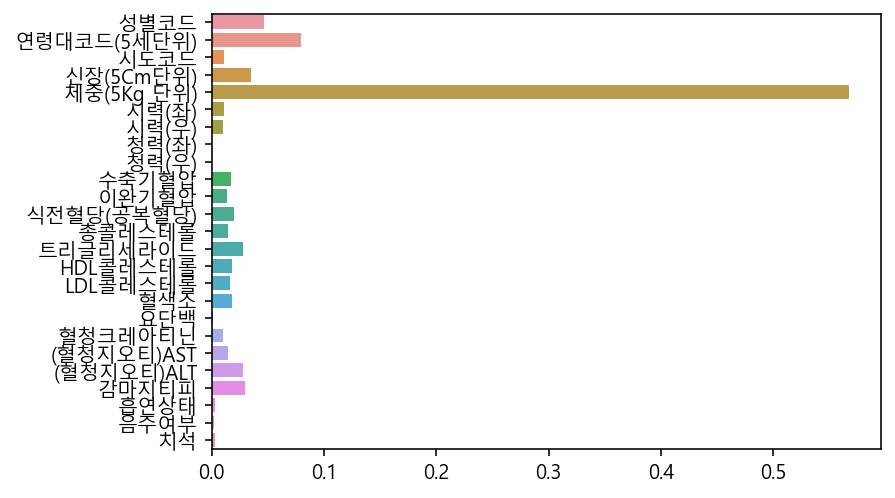

In [35]:
# 피처의 중요도 시각화 하기
sns.barplot(x=feature_importance, y=feature_names)

## 예측값과 실제값 비교하기

In [36]:
pd.DataFrame({"test" : y_test, 
              "predict" : y_predict,
              "error" : abs(y_test-y_predict)
             }).head()

,test,predict,error
6252,82.0,84.889000,2.889000
4684,80.5,77.210923,3.289077
1731,82.0,82.985000,0.985000
4742,90.0,88.540000,1.460000
4521,83.8,76.960000,6.840000


## 정확도(MAE) 측정하기

In [37]:
abs(y_test - y_predict).sum() / len(y_predict)

3.8056234479208486

In [38]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다. 
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# diff_count 에 값을 넣어줍니다.
mae = abs(y_test - y_predict).mean()
mae

3.8056234479208486

In [39]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

3.8056234479208486

## RMSE
* [평균 제곱근 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%8F%89%EA%B7%A0_%EC%A0%9C%EA%B3%B1%EA%B7%BC_%ED%8E%B8%EC%B0%A8)

### <font color="red">TODO 5</font> RMSE로 오차 구하기
* <font color="blue">RMSE</font>로 오차를 구해서 5 이하의 값이 나오도록 합니다. 이 값은 낮을 수록 오류가 작습니다.

In [40]:
# 밑줄을 채워 코드를 완성해 주세요.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
rmse

4.885523233231285

#### <font color="blue">TODO 5 Self Review</font>
* RMSE가 5 이하의 값이 나오는지 확인합니다.

In [41]:
# RMSE가 기준치 이하인지 확인합니다. 이 값은 낮을 수록 오류가 작습니다.
# 다음의 코드를 실행해서 확인합니다.
# 아래의 코드를 실행해서 확인을 해주어야 제출파일을 작성할 수 있으니 꼭 확인해 주세요!
checker.check_rmse(rmse)

rmse 스코어가 기준점수보다 낮습니다. 이 값은 낮을 수록 오차가 작습니다. 이어서 진행하셔도 좋습니다.


## 실제값과 예측값 비교하기

c:\deep\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='허리둘레'>

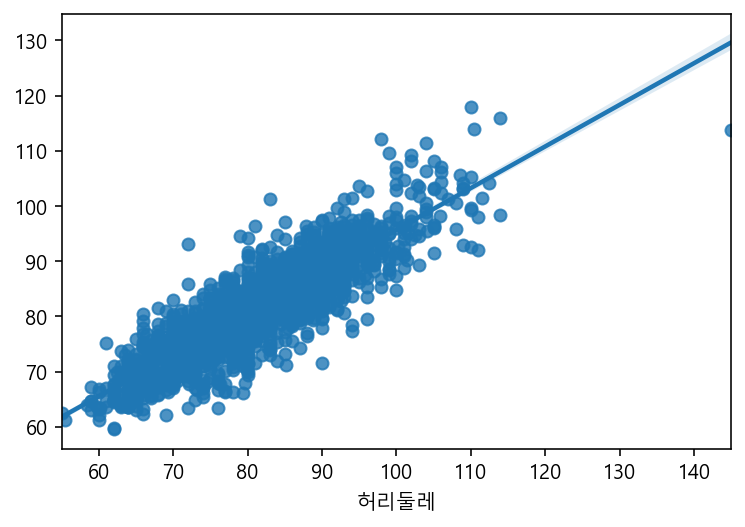

In [42]:
# regplot 으로 결과 값을 비교합니다.
# 회귀선에서 멀리 떨어질 수록 실제값과 예측값의 차이가 많이 납니다.
# 회귀선에 가까울수록 실제값과 예측값의 차이가 작습니다.

sns.regplot(y_test, y_predict)

### <font color="red">TODO 6</font> r2_score로 결정계수 구하기
* <font color="blue">r2_score</font>로 결정계수를 구해서 0.70 이상이 나오도록 합니다. 이 값은 1에 가까울 수록 정확도가 높습니다.


* [결정계수 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98)
* [Coefficient of determination - Wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [43]:
# 밑줄을 채워 코드를 완성해 주세요.
r2 = r2_score(y_test, y_predict)
r2

0.7533049131765964

#### <font color="blue">TODO 6 Self Review</font>
* r2_score로 결정계수를 구해서 0.70 이상이 나오는지 확인합니다. 이 값은 1에 가까울 수록 정확도가 높습니다.

In [44]:
# r2_score로 결정계수 값을 기준치 이상으로 구현했는지 확인합니다.
# 다음의 코드를 실행해서 확인합니다.
# 아래의 코드를 실행해서 확인을 해주어야 제출파일을 작성할 수 있으니 꼭 확인해 주세요!

checker.check_r2_score(r2)

r2 스코어가 기준점수 보다 높습니다. 이 값은 1에 가까울수록 오차가 작습니다. 이어서 진행하셔도 좋습니다.


c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\deep\python37\lib\site-packages\seaborn\distributions.py:20

<AxesSubplot:xlabel='허리둘레', ylabel='Density'>

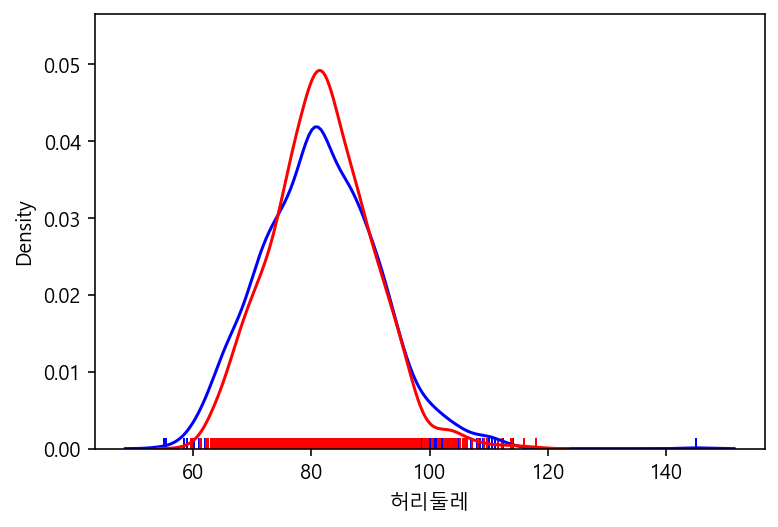

In [46]:
# 실제값과 예측값이 얼마나 차이가 나는지 비교해 봅니다.
sns.distplot(y_test, hist=False, rug=True, color='blue', label="실제값")
sns.distplot(y_predict, hist=False, rug=True,color='red', label="예측값")

## 프로젝트 제출 파일 만들기
* 아래의 코드를 실행하기 전에 <font color="red">실습한 주피터 노트북을 저장 버튼을 누르거나 다음의 단축키로 (ctrl/cmd + s) 저장</font>해 주세요. 
* 아래의 코드를 실행해 주세요. 
* 프로젝트 제출 파일이 생성됩니다.
* `제출파일 자동생성`은 주피터 익스텐션이 설치되어 있어야 실행이 가능합니다.
* 주피터 익스텐션은 다음의 방법으로 설치 가능합니다.
* 주피터 노트북의 `홈화면에서 > 오른쪽 상단 > New > Ternimal`로 설치해 주세요.
    * pip install jupyter_contrib_nbextensions
    * conda install jupyter_contrib_nbextensions
* submit 폴더에 다음 두 개의 파일이 생성되어 있어야 제출 파일이 제대로 생성된 것입니다.
    * health-regression-project.html
    * regression_submission.csv
* html 파일이 submit 폴더에 생성되지 않았다면 주피터 노트북의 `메뉴 > File > Download as > HTML(.html)` 을 통해 html 파일을 생성해 주시고 shubmit 폴더에 저장 후 압축해서 제출해 주세요.

In [47]:
# 아래의 코드를 실행해서 프로젝트가 잘 작성되었는지 확인해 주세요.
# TODO 항목이 잘 구현되었다면 아래의 코드는 submit.zip 파일로 제출파일을 생성합니다.
# TODO 항목을 만족하지 않는다면 구현해야할 목록이 출력됩니다.
# 실행시간이 조금 오래 걸릴 수도 있습니다. 오류가 나지 않는다면 최대 30초 정도 기다려주세요!
checker.check_submit()

[ Self-Check ] Submit 파일 생성완료! 위치: 'submit'
[ Self-Check ] 시스템: Windows
[ Self-Check ] submit.zip 생성 완료!
[ Self-Check ] 모든 평가기준을 통과했습니다. 압축파일을 제출해주세요!
